# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

In [1]:
# Load Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
import pandas as pd
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


In [3]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup[lookup["field name"] == "weather_conditions"]

,table,field name,code/format,label,note
86,Accident,weather_conditions,1,Fine no high winds,NaN
87,Accident,weather_conditions,2,Raining no high winds,NaN
88,Accident,weather_conditions,3,Snowing no high winds,NaN
89,Accident,weather_conditions,4,Fine + high winds,NaN
90,Accident,weather_conditions,5,Raining + high winds,NaN
91,Accident,weather_conditions,6,Snowing + high winds,NaN
92,Accident,weather_conditions,7,Fog or mist,NaN
93,Accident,weather_conditions,8,Other,NaN
94,Accident,weather_conditions,9,Unknown,NaN
95,Accident,weather_conditions,-1,Data missing or out of range,NaN


## ⌛️ Time is ticking. Good luck!

In [4]:
# Explore accidents Data set
# check for each column and it's type and the nan values
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

### There are missing values in longitude, latitude columns

### date, and time column have object type it should be timestamp

In [5]:
# Get columns with missing values/ nan values 
Columns_with_missing_values = accidents.isna().any()

# Print How many columns does it have nan values?
print("Number of columns contains missing values in accidents dataset are: ", Columns_with_missing_values.sum())

# Print How many nan values in each column?
for col in Columns_with_missing_values[Columns_with_missing_values == True].index:
    print("Number of missing values in column: {0} are: {1} rows".format(col, accidents[col].isna().sum()))

Number of columns contains missing values in accidents dataset are:  2
Number of missing values in column: longitude are: 14 rows
Number of missing values in column: latitude are: 14 rows


In [6]:
# Check for type of data in date column
print(type(accidents["date"][0]))

# Check for type of time column 
print(type(accidents["time"][0]))

<class 'str'>
<class 'str'>


In [7]:
# Convert time from string to datetime.time
accidents["time"] = pd.to_datetime(accidents['time'], format= '%H:%M').dt.time

# Check for type of time column 
print(type(accidents["time"][0]))

<class 'datetime.time'>


In [8]:
# Convert date from string to datetime.time
accidents["date"] = pd.to_datetime(accidents["date"])

# Check for type of date column 
print(type(accidents["date"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# What time of day and day of the week do most major incidents happen?

In [9]:
accidents["accident_severity"].value_counts(sort=True)

3    71453
2    18355
1     1391
Name: accident_severity, dtype: int64

### Most Accident in this data set are degree 3 which mean Slight Accident  
#### So getting the most day of the week do most major incidents happen will be baised twards Slight Accident, 
#### So I will split each accident_severity 

In [10]:
# Most major incidents when accident_severity == 3
accident_ser1 = accidents[accidents["accident_severity"] == 1]
accident_ser2 = accidents[accidents["accident_severity"] == 2]
accident_ser3 = accidents[accidents["accident_severity"] == 3]

In [11]:
# Day of the week code
dayes = {1:"Sunday", 2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 7:"Saturday"}

#### Most day in the week do most major incidents happen

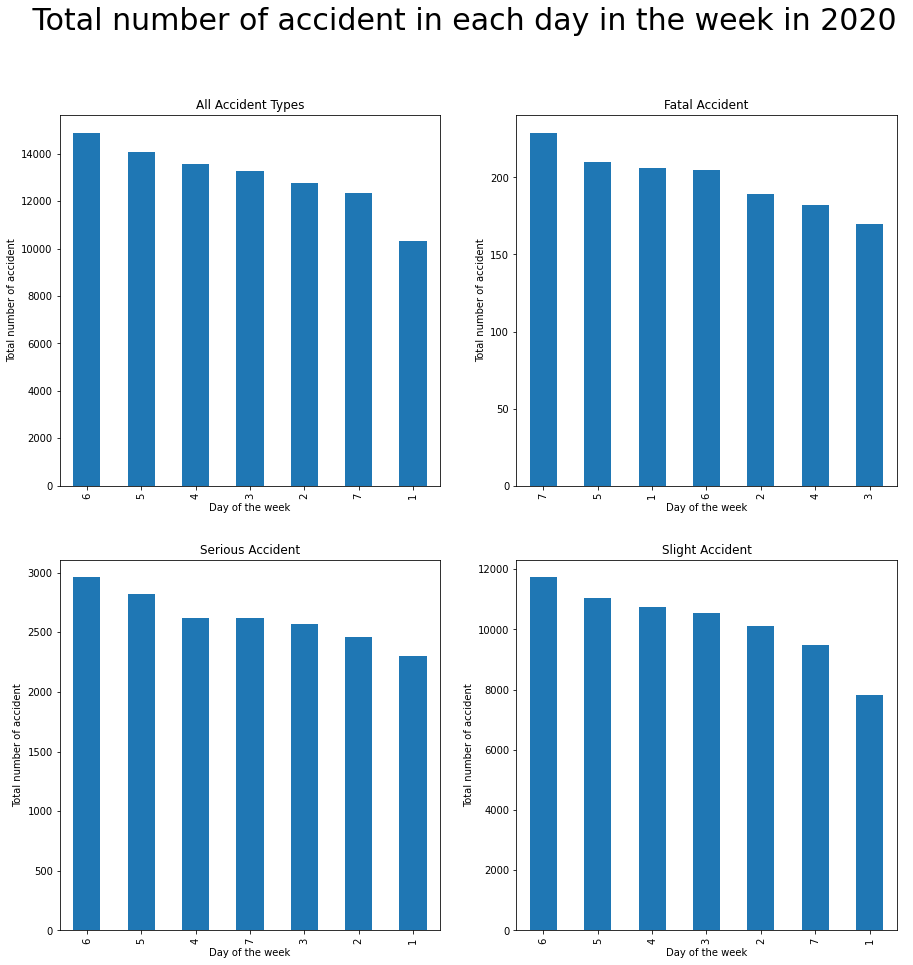

In [12]:
# Plotting How many number of accident in each day of the week in 2020
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle(' Total number of accident in each day in the week in 2020 ', fontsize=30)

# All Accident Types 
accidents['day_of_week'].value_counts(sort=True).plot(kind="bar", ax=ax[0,0])
ax[0,0].set_title("All Accident Types")
ax[0,0].set_xlabel("Day of the week")
ax[0,0].set_ylabel("Total number of accident")

# Fatal Accident
accident_ser1['day_of_week'].value_counts(sort=True).plot(kind="bar", ax=ax[0,1])
ax[0,1].set_title("Fatal Accident")
ax[0,1].set_xlabel("Day of the week")
ax[0,1].set_ylabel("Total number of accident")

# Serious Accident
accident_ser2['day_of_week'].value_counts(sort=True).plot(kind="bar", ax=ax[1,0])
ax[1,0].set_title("Serious Accident")
ax[1,0].set_xlabel("Day of the week")
ax[1,0].set_ylabel("Total number of accident")

# Slight Accident
accident_ser3['day_of_week'].value_counts(sort=True).plot(kind="bar", ax=ax[1,1])
ax[1,1].set_title("Slight Accident")
ax[1,1].set_xlabel("Day of the week")
ax[1,1].set_ylabel("Total number of accident")
plt.show();

So, In common Friday is the most day of the week when accidents happen the most, whether serious accidents or Slight accidents <br>
And Sunday being the safest day of the week on UK roads <br>
this maybe because of lots of people making journeys on a Friday or people speeding home from work <br>
<br>
But For Fatal Accident Saterday is  the most day of the week when Fatal accidents happen the most <br>
And Tuesday is the least day of the week in the number of Fatal accidents !! <br>
Can guess why from ather factors like: <br>
1- Where most of fatal accedint happen in Saterday <br>
2- Is there's a relationship btween car speed and day of the week  <br>


In [13]:
# What are the most common times of day for accidents? 
# In whole dataset
print("Most common times of day for accidents in general: ", accidents.groupby(["time"]).count()["accident_severity"].idxmax())

# In Slight Accident (accident_severity == 3)
print("Most common times of day for Slight Accident: ", accident_ser3.groupby(["time"]).count()["accident_severity"].idxmax())

# In Serious Accident (accident_severity == 2)
print("Most common times of day for Serious Accident: ", accident_ser2.groupby(["time"]).count()["accident_severity"].idxmax())

# In Fatal Accident (accident_severity == 1)
print("Most common times of day for Fatal Accidents: ", accident_ser1.groupby(["time"]).count()["accident_severity"].idxmax())

Most common times of day for accidents in general:  17:00:00
Most common times of day for Slight Accident:  17:00:00
Most common times of day for Serious Accident:  16:00:00
Most common times of day for Fatal Accidents:  18:00:00


In [14]:
# What time of day in most day of the week do most major incidents happen?

# In whole dataset
general_most_time = accidents.groupby(["day_of_week", "time"]).count()["accident_severity"].idxmax()
print("Most common times of day for accaccidents is {0} at {1}".format(dayes[general_most_time[0]], general_most_time[1]))

# In Fatal Accident (accident_severity == 1)
fatal_most_time = accident_ser1.groupby(["day_of_week", "time"]).count()["accident_severity"].idxmax()
print("Most common times of day for Fatal Accidents is {0} at {1}".format(dayes[fatal_most_time[0]], fatal_most_time[1]))

Most common times of day for accaccidents is Friday at 17:00:00
Most common times of day for Fatal Accidents is Thursday at 18:00:00


## Measure the impact of those features on the accedients happen during the week 
#### number_of_vehicles, number_of_casualties, first_road_class, road_type speed_limit, junction_detail, junction_control,
#### pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions,
#### road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area

In [15]:
def get_labels(column):
    # Get label for each code value 
    labels_df = lookup[lookup["field name"] == column][["code/format", "label"]]
    labels = labels_df["label"].values
    label_code = labels_df["code/format"].values
    return labels, label_code

def get_code_labels_dict(column):
    '''
    Return Dictionary containes each code in the column as key and it's label as value
    '''
    labels, label_code = get_labels(column)
    dict1 = {}    
    for i in range(len(label_code)):
        dict1[label_code[i]] = labels[i]       
    return dict1

In [16]:
features = ["first_road_class", "road_type", "junction_detail", "junction_control",
            "pedestrian_crossing_human_control", "pedestrian_crossing_physical_facilities", "light_conditions", "weather_conditions",
            "road_surface_conditions", "special_conditions_at_site", "carriageway_hazards", "urban_or_rural_area"]

In [17]:
dayes_list = []
for value in dayes.values():
    dayes_list.append(value)
dayes_list

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [18]:
def plot_countplot(data, hue_column, x_ticks_labels, x_column="day_of_week"):
    labels, _ = get_labels(hue_column)
    if len(labels) > 1:
        plt.figure(figsize=(13, 5));
        ax = sns.countplot(data=data, x=x_column, hue=hue_column, palette="colorblind")
        featur_name = hue_column.replace("_", " ").capitalize()
        plt.title("The impact of {0} on Fatal Accidents During the week".format(featur_name))
        plt.legend(title=featur_name, loc='center', labels=labels);
        plt.xticks(range(len(x_ticks_labels)), x_ticks_labels)
        
        total = data.shape[0]
        for p in ax.patches:
            percentage = '{:.1f}%'.format((p.get_height() / total) * 100)
            x = p.get_x() + p.get_width()
            y = p.get_height()
            ax.annotate(percentage, (x, y),ha='center')
        plt.show()

In [19]:
features = ["first_road_class", "road_type", "junction_detail", "junction_control",
            "pedestrian_crossing_human_control", "pedestrian_crossing_physical_facilities", "light_conditions", "weather_conditions",
            "road_surface_conditions", "special_conditions_at_site", "carriageway_hazards", "urban_or_rural_area"]

# Analysis of Fatal Accidents throughout the week over 2020 vs. variety factors

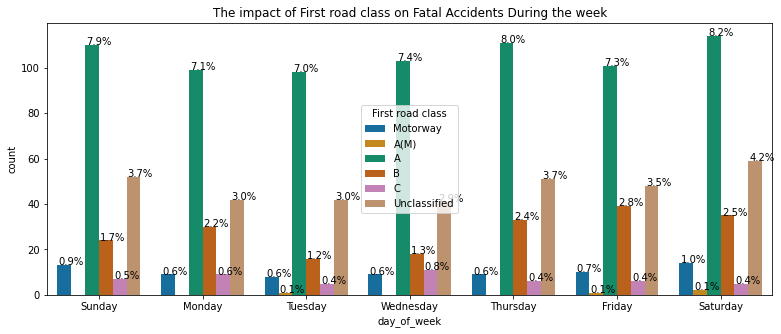

In [20]:
plot_countplot(accident_ser1, "first_road_class", dayes_list, "day_of_week")

#### "A" roads – major roads intended to provide large-scale transport links within or between areas   "unclassified" – local roads intended for local traffic. The vast majority (60%) of roads in the UK fall within this category   It seems like most of Fatal Accedints happen in A roads, cause it links btween many areas
#### -----------------------------------------------------------------

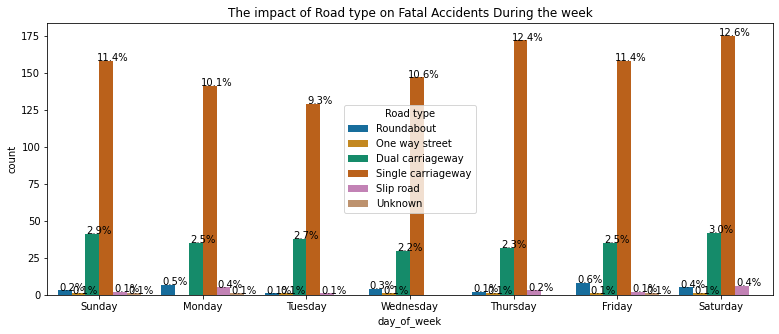

In [21]:
plot_countplot(accident_ser1, "road_type", dayes_list, "day_of_week")

#### Single Carriageway is a road without central reservation to separate opposing flows of traffic. So it make sense that most of Fatal accident happen in this roads
#### -----------------------------------------------------------------

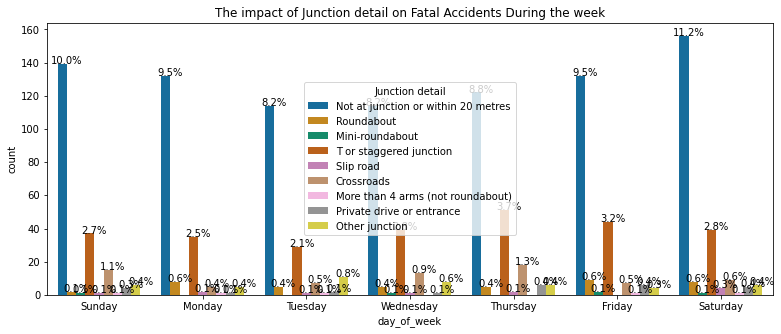

In [22]:
plot_countplot(accident_ser1, "junction_detail", dayes_list, "day_of_week")

 #### Unlike I thought that most Fatal accidents happen in slope roads or in roundabout
 #### -----------------------------------------------------------------

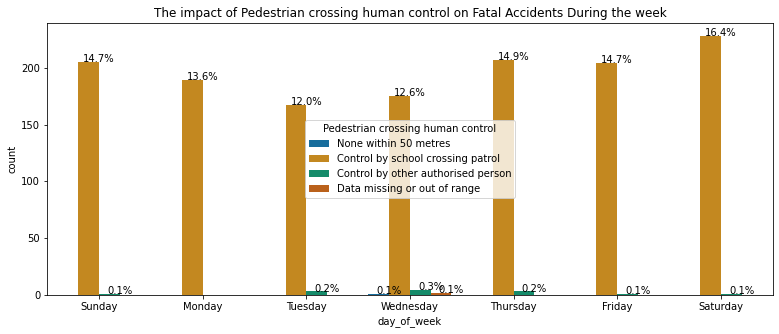

In [23]:
plot_countplot(accident_ser1, "pedestrian_crossing_human_control", dayes_list, "day_of_week")

 #### Surprisingly most of fatal accidents happen because of the school crossing patrol !! maybe because the stop sign is temprary and holded by people 
 #### -----------------------------------------------------------------

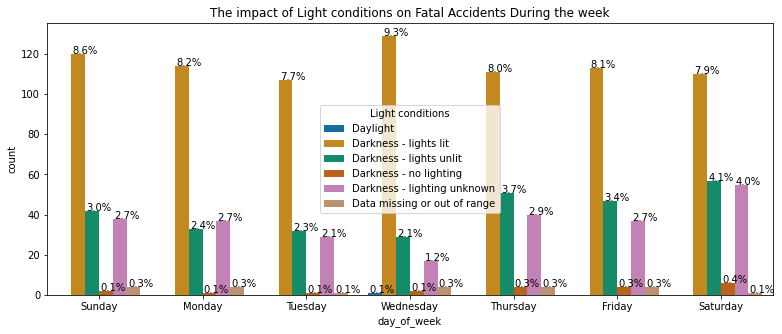

In [24]:
plot_countplot(accident_ser1, "light_conditions", dayes_list, "day_of_week")

 #### Obviously boor light would cause fatal accidents 
 #### -----------------------------------------------------------------

## Conclusion last figures show us that most of accidents happen in the days before weekend or in weekends in general

# -------------------------------------------------------------------------------------------

# What characteristics stand out in major incidents compared with other accidents?
# Analysis of All types of Accidents vs. variety factors over 2020 

### Is weather conditions a factor in the occurrence of Fatal accidents?

In [25]:
def get_pivot_table(data, index, values, agg_fun):
    # Create pivot table to get count of acccedient for each column on each index
    pivot_df = pd.pivot_table(data, columns="accident_severity", index=index, values=values, aggfunc=agg_fun)
    
    # Get label for each code value   
    dict1 = get_code_labels_dict(index)

    # reset index to map each index with it's label from lookups.csv
    pivot_df.reset_index(inplace=True)
    col_name = index + "_label" 
    pivot_df[index] = pivot_df[index].astype(str)
    pivot_df[col_name] = pivot_df[index].map(dict1)
    
    
    # Get the percentage of impact of each weather_conditions on each accident_severity
    pivot_df["1_percent"] = pivot_df[1] / accident_ser1.shape[0] *100
    pivot_df["2_percent"] = pivot_df[2] / accident_ser2.shape[0] *100
    pivot_df["3_percent"] = pivot_df[3] / accident_ser3.shape[0] *100
    
    # Print the result 
    print("--------------Number of {0} related accidents-----------------".format(index))
    display(pivot_df[[col_name, "1_percent", "2_percent", "3_percent"]])
    

In [26]:
# Number of weather related accidents
get_pivot_table(accidents, "weather_conditions", "accident_index", "count")

--------------Number of weather_conditions related accidents-----------------


accident_severity,weather_conditions_label,1_percent,2_percent,3_percent
0,Data missing or out of range,0.071891,NaN,NaN
1,Fine no high winds,81.020848,79.498774,76.987670
2,Raining no high winds,9.633357,11.833288,12.983360
3,Snowing no high winds,0.143781,0.234269,0.195933
4,Fine + high winds,2.372394,1.868701,1.434509
5,Raining + high winds,2.875629,1.934078,1.777392
6,Snowing + high winds,0.071891,0.081722,0.079773
7,Fog or mist,1.294033,0.659221,0.519222
8,Other,1.437815,2.239172,3.076148
9,Unknown,1.078361,1.650776,2.945992


#### Unexpectedly most of accidents happen in fine weather, raining doesn't have much impact !!
#### ----------------------


## Is Road Type a factor in the occurrence of Fatal accidents?

In [27]:
get_pivot_table(accidents, "road_type", "accident_index", "count")

--------------Number of road_type related accidents-----------------


accident_severity,road_type_label,1_percent,2_percent,3_percent
0,Roundabout,2.156722,4.701716,6.559557
1,One way street,0.431344,1.574503,2.338600
2,Dual carriageway,18.188354,13.494961,14.661386
3,Single carriageway,77.641984,78.109507,72.092144
4,Slip road,1.365924,1.225824,1.774593
5,Unknown,0.215672,0.893490,2.573720


### It seems that theSingle carriageway roads have a higher incidence of accidents
#### ----------------------

## Is Area Type a factor in the occurrence of Fatal accidents?

In [28]:
get_pivot_table(accidents, "urban_or_rural_area", "accident_index", "count")

--------------Number of urban_or_rural_area related accidents-----------------


accident_severity,urban_or_rural_area_label,1_percent,2_percent,3_percent
0,Urban,38.389648,60.010896,70.239178
1,Rural,61.610352,39.978208,29.744028
2,Unallocated,NaN,0.010896,0.016794


#### It seems that the roads in the rural are more prone to accidents than the urban roads.
#### This is possible because the roads of the rural mostly are not as efficient as the urban roads.
#### ----------------------

## Is Surface Conditions a factor in the occurrence of Fatal accidents?

In [29]:
get_pivot_table(accidents, "road_surface_conditions", "accident_index", "count")

--------------Number of road_surface_conditions related accidents-----------------


accident_severity,road_surface_conditions_label,1_percent,2_percent,3_percent
0,Data missing or out of range,0.287563,0.228820,0.377871
1,Dry,66.427031,69.076546,68.709501
2,Wet or damp,32.063264,29.065650,28.632808
3,Snow,0.071891,0.141651,0.172141
4,Frost or ice,0.862689,0.898938,0.821519
5,Flood over 3cm. deep,0.287563,0.212476,0.197333
6,unknown (self reported),NaN,0.375919,1.088828


#### Most of accident during 2020 happen in dry surface !
#### ----------------------

## Is Light Conditions a factor in the occurrence of Fatal accidents?

In [30]:
get_pivot_table(accidents, "light_conditions", "accident_index", "count")

--------------Number of light_conditions related accidents-----------------


accident_severity,light_conditions_label,1_percent,2_percent,3_percent
0,Data missing or out of range,0.071891,NaN,NaN
1,Daylight,57.800144,68.880414,71.390984
2,Darkness - lights lit,20.920201,21.541814,20.686325
3,Darkness - lights unlit,1.437815,0.817216,0.720754
4,Darkness - no lighting,18.188354,7.213293,4.559641
5,Darkness - lighting unknown,1.581596,1.547262,2.642296


#### Most of accidents happen in daylight maybe this because Daylight is considered as rich hours, where people driving a lot
#### ----------------------

## Is Physical Crossing Facilities a factor in the occurrence of Fatal accidents?

In [31]:
get_pivot_table(accidents, "pedestrian_crossing_physical_facilities", "accident_index", "count")

--------------Number of pedestrian_crossing_physical_facilities related accidents-----------------


accident_severity,pedestrian_crossing_physical_facilities_label,1_percent,2_percent,3_percent
0,Data missing or out of range,0.071891,0.087170,0.165144
1,No physical crossing facilities within 50 metres,85.693746,80.294198,74.649070
2,Zebra,1.150252,3.366930,4.481267
3,"Pelican, puffin, toucan or similar non-junctio...",4.888569,5.562517,5.337774
4,Pedestrian phase at traffic signal junction,4.529116,6.450558,8.702224
5,Footbridge or subway,0.359454,0.185236,0.223923
6,Central refuge,3.163192,2.969218,2.618504
7,unknown (self reported),0.143781,1.084173,3.822093


#### The failure of the traffic light has an impact on the occurrence of the Fatal accident but in most cases there's no much accidents happen because of it 
#### ----------------------

In [32]:
get_pivot_table(accidents, "junction_detail", "accident_index", "count")

--------------Number of junction_detail related accidents-----------------


accident_severity,junction_detail_label,1_percent,2_percent,3_percent
0,Data missing or out of range,NaN,NaN,0.002799
1,Not at junction or within 20 metres,65.348670,46.935440,39.821981
2,Roundabout,3.019410,6.150913,8.614054
3,Mini-roundabout,0.359454,1.105966,1.528277
4,T or staggered junction,19.698059,27.687279,28.368298
5,Slip road,0.790798,0.909834,1.372930
6,Crossroads,5.319914,8.400981,9.534939
7,More than 4 arms (not roundabout),0.359454,1.318442,1.444306
8,Private drive or entrance,1.797268,1.977663,2.097883
9,Other junction,3.306973,5.039499,5.225813


#### Not at junction > T or staggered junction > Crossroads
#### ----------------------

In [33]:
get_pivot_table(accidents, "day_of_week", "accident_index", "count")

--------------Number of day_of_week related accidents-----------------


accident_severity,day_of_week_label,1_percent,2_percent,3_percent
0,Sunday,14.809490,12.525197,10.930262
1,Monday,13.587347,13.413239,14.164556
2,Tuesday,12.221423,13.979842,14.738359
3,Wednesday,13.084112,14.295832,15.056051
4,Thursday,15.097052,15.363661,15.431123
5,Friday,14.737599,16.126396,16.407988
6,Saturday,16.462976,14.295832,13.271661


#### Most of accident happen in Friday > Thursday > Saturday
#### ----------------------

In [34]:
get_pivot_table(accidents, "first_road_class", "accident_index", "count")

--------------Number of first_road_class related accidents-----------------


accident_severity,first_road_class_label,1_percent,2_percent,3_percent
0,Motorway,5.176132,2.342686,2.619904
1,A(M),0.287563,0.201580,0.232321
2,A,52.911574,43.159902,44.709109
3,B,14.018692,13.658404,12.298994
4,C,3.522646,4.511032,5.511315
5,Unclassified,24.083393,36.126396,34.628357


#### Most of Accedints happen in A roads, cause it links btween many areas

# ------------------------------------------------------------------------------------------------

### Where most of fatal accedint happen in Saterday?road_type

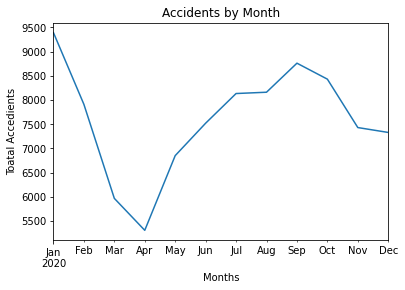

In [35]:
accidents.resample("M", on="date")["accident_severity"].count().plot()
plt.title("Accidents by Month")
plt.xlabel("Months")
plt.ylabel("Toatal Accedients")
plt.show()

#### Most of accidents happen on Jan 
#### and Autumn months [Sep - Oct - Nov] 
#### Maybe because of the rain or wind  
 

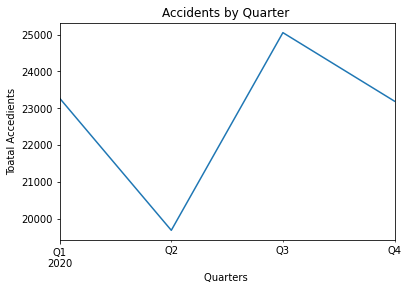

In [36]:
accidents.resample("Q", on="date")["accident_severity"].count().plot()
plt.title("Accidents by Quarter ")
plt.xlabel("Quarters ")
plt.ylabel("Toatal Accedients")
plt.show()

# On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

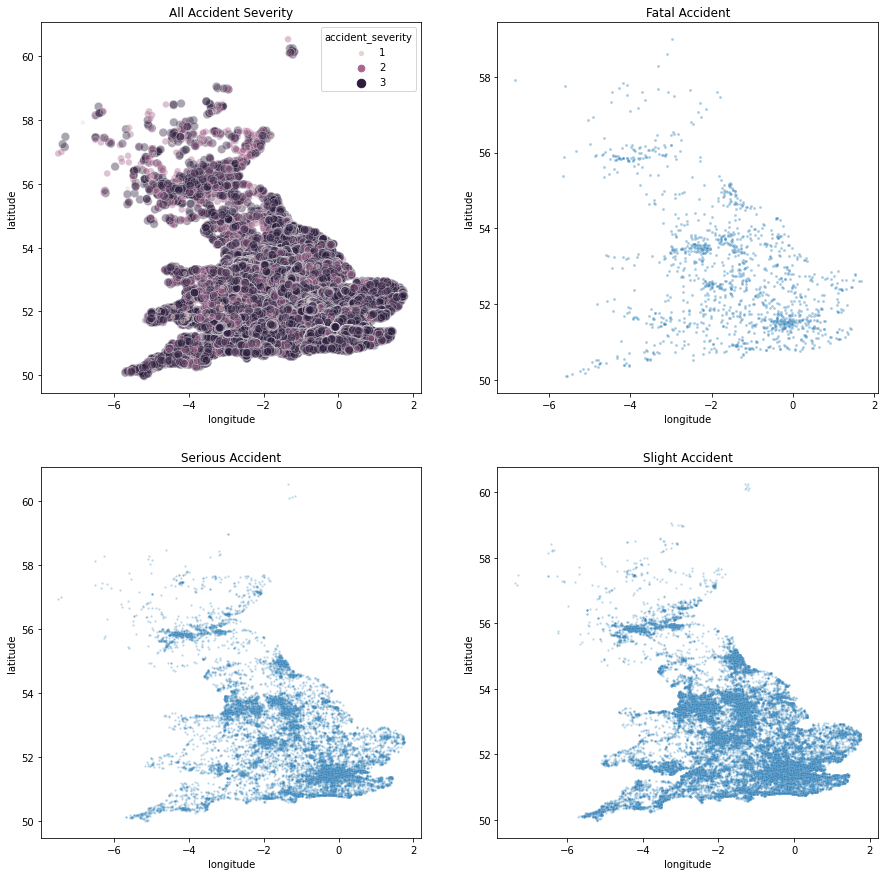

In [37]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
sns.color_palette("colorblind")
  
sns.scatterplot(x="longitude", y="latitude", hue="accident_severity", size="accident_severity", data=accidents, alpha=0.4, ax=ax[0,0])
ax[0, 0].set_title("All Accident Severity")

sns.scatterplot(x="longitude", y="latitude", data=accident_ser1, alpha=0.4, ax=ax[0,1], s=8)
ax[0, 1].set_title("Fatal Accident")

sns.scatterplot(x="longitude", y="latitude", data=accident_ser2, alpha=0.3, ax=ax[1,0], s=5)
ax[1, 0].set_title("Serious Accident")

sns.scatterplot(x="longitude", y="latitude", data=accident_ser3, alpha=0.3, ax=ax[1,1], s=5)
ax[1, 1].set_title("Slight Accident")
plt.show()

## The most accidents in Big cities like  London, Birmingham, Leeds, Liverpool and Manchester 

## Sheffield, , Southwark, Westminster, Lambeth, Barnet, Cornwall

## Places with the highest number of Fatal Accidents

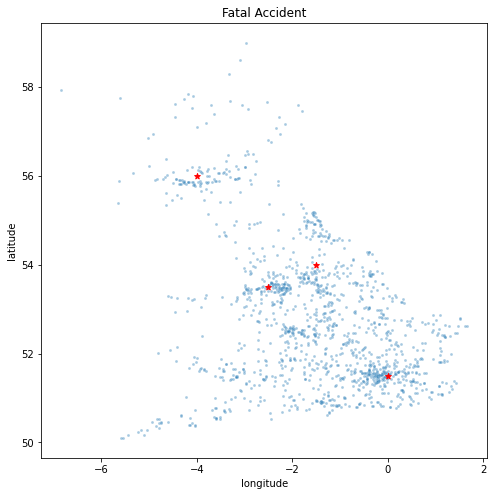

In [38]:
plt.figure(figsize=(8, 8));
sns.scatterplot(x="longitude", y="latitude", data=accident_ser1, alpha=0.4, s=8)
plt.title("Fatal Accident")
x_high = [0, -1.5, -2.5, -4]
y_high = [51.5, 54, 53.5, 56]
plt.scatter(x_high, y_high, marker="*", color="red")
plt.show()